In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [46]:
df = pd.read_csv("data/NYC_Trees.csv")
df

,CommonName,Native,Borough,Condition,Diameter(cm),Height(m),Age,PercentFoliageDensity,CanopyArea(msq),CompensatoryValue
0,American Elm,YES,Staten Island,Excellent,79.5,27.4,120.0,80.0,289.6,6838.0
1,American Elm,YES,Staten Island,Good,22.3,6.1,16.0,55.0,10.5,936.0
2,American Elm,YES,Manhattan,Good,7.6,6.4,13.0,35.0,7.3,155.0
3,American Elm,YES,Manhattan,Good,10.2,6.4,14.0,40.0,18.7,276.0
4,American Holly,YES,Staten Island,Good,25.8,5.5,20.0,90.0,18.7,1215.0
...,...,...,...,...,...,...,...,...,...,...
314,Tuliptree,YES,Staten Island,Excellent,106.7,34.1,126.0,90.0,591.0,17053.0
315,Tuliptree,YES,Staten Island,Good,30.5,14.6,46.0,50.0,45.6,1842.0
316,Tuliptree,YES,Staten Island,Excellent,137.2,35.1,214.0,70.0,378.3,23069.0
317,White Mulberry,NO,Staten Island,Good,25.5,10.1,29.0,55.0,84.3,1200.0


In [47]:
df.shape

(319, 10)

In [48]:
df.describe()

,Diameter(cm),Height(m),Age,PercentFoliageDensity,CanopyArea(msq),CompensatoryValue
count,318.000000,319.000000,318.000000,318.000000,319.000000,318.000000
mean,37.657862,12.859248,57.748428,57.012579,83.759875,3254.226415
std,28.991604,8.070232,49.482810,20.910803,86.272709,3929.148613
min,2.500000,1.200000,4.000000,5.000000,0.300000,54.000000
25%,12.700000,5.950000,18.000000,40.000000,18.700000,637.000000
50%,25.450000,11.600000,38.000000,55.000000,49.300000,1187.000000
75%,63.500000,19.500000,99.750000,75.000000,128.700000,5364.250000
max,147.300000,35.100000,320.000000,95.000000,591.000000,23069.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CommonName             319 non-null    object 
 1   Native                 319 non-null    object 
 2   Borough                319 non-null    object 
 3   Condition              319 non-null    object 
 4   Diameter(cm)           318 non-null    float64
 5   Height(m)              319 non-null    float64
 6   Age                    318 non-null    float64
 7   PercentFoliageDensity  318 non-null    float64
 8   CanopyArea(msq)        319 non-null    float64
 9   CompensatoryValue      318 non-null    float64
dtypes: float64(6), object(4)
memory usage: 25.1+ KB


### Step 1: Handling Missing Values
First, we will check for missing values and decide how to handle them

In [50]:
# check for missing values
df.isnull().sum()

CommonName               0
Native                   0
Borough                  0
Condition                0
Diameter(cm)             1
Height(m)                0
Age                      1
PercentFoliageDensity    1
CanopyArea(msq)          0
CompensatoryValue        1
dtype: int64

In [51]:
# drop the missing values for NA values
df.dropna(inplace=True)

print(df.isnull().sum())
print(f"\nShape of dataframe {df.shape}.")

CommonName               0
Native                   0
Borough                  0
Condition                0
Diameter(cm)             0
Height(m)                0
Age                      0
PercentFoliageDensity    0
CanopyArea(msq)          0
CompensatoryValue        0
dtype: int64

Shape of dataframe (315, 10).


## Step 2: Data Transformation and Normalization

Normalize the numerical features to have a mean of 0 and a standard deviation of 1.

In [52]:
# List of numerical features
numerical_features = ['Diameter(cm)','Height(m)','Age','PercentFoliageDensity','CanopyArea(msq)']

In [53]:
# Standerdize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the dataframe after normalization
print(df.head())

       CommonName Native        Borough  Condition  Diameter(cm)  Height(m)  \
0    American Elm    YES  Staten Island  Excellent      1.441930   1.794675   
1    American Elm    YES  Staten Island       Good     -0.529815  -0.833585   
2    American Elm    YES      Manhattan       Good     -1.036539  -0.796567   
3    American Elm    YES      Manhattan       Good     -0.946915  -0.796567   
4  American Holly    YES  Staten Island       Good     -0.409166  -0.907620   

        Age  PercentFoliageDensity  CanopyArea(msq)  CompensatoryValue  
0  1.261522               1.101079         2.381208             6838.0  
1 -0.841336              -0.094921        -0.847699              936.0  
2 -0.901995              -1.051720        -0.884720              155.0  
3 -0.881775              -0.812520        -0.752833              276.0  
4 -0.760457               1.579479        -0.752833             1215.0  


## Step 3: Encoding Categorical Variables

Encode the categorical features using OneHotEncoder for nominal features and LabelEncoder for ordinal features.

In [54]:
categorical_feature = ['CommonName','Native','Borough','Condition']

In [55]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df['CommonName'] = le.fit_transform(df['CommonName'])
df['Native'] = le.fit_transform(df['Native'])
df['Borough'] = le.fit_transform(df['Borough'])
df['Condition'] = le.fit_transform(df['Condition'])

print(df.head())

   CommonName  Native  Borough  Condition  Diameter(cm)  Height(m)       Age  \
0           0       1        2          0      1.441930   1.794675  1.261522   
1           0       1        2          1     -0.529815  -0.833585 -0.841336   
2           0       1        1          1     -1.036539  -0.796567 -0.901995   
3           0       1        1          1     -0.946915  -0.796567 -0.881775   
4           1       1        2          1     -0.409166  -0.907620 -0.760457   

   PercentFoliageDensity  CanopyArea(msq)  CompensatoryValue  
0               1.101079         2.381208             6838.0  
1              -0.094921        -0.847699              936.0  
2              -1.051720        -0.884720              155.0  
3              -0.812520        -0.752833              276.0  
4               1.579479        -0.752833             1215.0  


## Step 4: Feature Engineering and Predictive Modeling

In [72]:
# Define bins and labels
bins = [-float('inf'), 1000, 5000, 10000, float('inf')]
labels = ['very low', 'low', 'medium', 'high']

# Bin the 'CompensatoryValue' column
df['CompensatoryValueCategory'] = pd.cut(df['CompensatoryValue'], bins=bins, labels=labels, right=False)

# drop original 'CompensatoryValue' column
df.drop('CompensatoryValue', axis=1, inplace=True)

# Display the binned data
print(df)

     CommonName  Native  Borough  Condition  Diameter(cm)  Height(m)  \
0             0       1        2          0      1.441930   1.794675   
1             0       1        2          1     -0.529815  -0.833585   
2             0       1        1          1     -1.036539  -0.796567   
3             0       1        1          1     -0.946915  -0.796567   
4             1       1        2          1     -0.409166  -0.907620   
..          ...     ...      ...        ...           ...        ...   
314          43       1        2          0      2.379543   2.621405   
315          43       1        2          1     -0.247152   0.215251   
316          43       1        2          0      3.430911   2.744797   
317          44       0        2          1     -0.419507  -0.340015   
318          45       1        2          1      0.628413   0.819874   

          Age  PercentFoliageDensity  CanopyArea(msq)  \
0    1.261522               1.101079         2.381208   
1   -0.841336        

In [73]:
# Define the target variable(y) and features(x)
x = df.iloc[:,:9].values
y = df.iloc[:,9].values

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [75]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"\nx_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (252, 9), y_train shape: (252,)

x_test shape: (63, 9), y_test shape: (63,)


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier()
clf.fit(x_train, y_train)



RandomForestClassifier()

In [88]:
y_pred = clf.predict(x_test)

print(f"\n Classification Report: {classification_report(y_test, y_pred)}")

print(f"\n Accuracy: {accuracy_score(y_test,y_pred)}")


 Classification Report:               precision    recall  f1-score   support

        high       1.00      1.00      1.00         4
         low       0.93      0.72      0.81        18
      medium       0.82      1.00      0.90        14
    very low       0.93      0.96      0.95        27

    accuracy                           0.90        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.91      0.90      0.90        63


 Accuracy: 0.9047619047619048


In [79]:
pred_data = {'Actual value': y_test, 'Predicted value': y_pred}
pred_data = pd.DataFrame(pred_data)

pred_data

,Actual value,Predicted value
0,medium,medium
1,low,low
2,medium,medium
3,very low,very low
4,very low,very low
...,...,...
58,low,low
59,medium,medium
60,low,low
61,medium,medium


In [80]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(p=5)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"\nAccuracy:  {accuracy_score(y_test, y_pred)}")

[[ 1  1  2  0]
 [ 0 11  0  7]
 [ 0  4 10  0]
 [ 0  3  0 24]]

Accuracy:  0.7301587301587301


<Axes: >

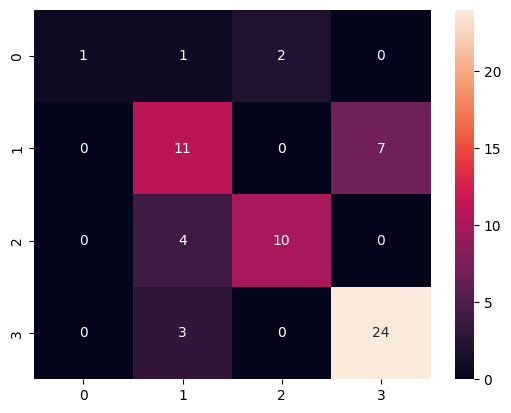

In [86]:
sns.heatmap(cm, annot=True)